In [1]:
import gym
import numpy as np
import time
import matplotlib.pyplot as plt

### Value iteration

In [2]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += reward
        if done:
            break
    return total_reward

def evaluate_policy(env, policy, gamma, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.action_space.n)
        for a in range(env.action_space.n):
            for next_sr in env.P[s][a]:
                p, s_, r, _ = next_sr
                q_sa[a] += (p * (r + gamma * v[s_]))
        policy[s] = np.argmax(q_sa)
    return policy

def value_iteration(env, gamma):
    v = np.zeros(env.nS)  # initialize value-function
    max_iterations = 100000
    eps = 1e-20
    for i in range(1, max_iterations+1):
        prev_v = np.copy(v)
        for s in range(env.nS):
            q_sa = [sum([p*(r + gamma*prev_v[s_]) for p, s_, r, _ in env.P[s][a]]) for a in range(env.nA)] 
            v[s] = max(q_sa)
        if (np.sum(np.fabs(prev_v - v)) <= eps):
            # print ('Value-iteration converged at iteration# %d.' %(i))
            break
    return v, i

In [3]:
env_name = 'FrozenLake8x8-v0'
env = gym.make(env_name)
env = env.unwrapped

gammas = np.arange(0.1, 1, 0.05)
times=[]
iterations=[]
listscore=[]
val_p=[]

for gamma in gammas:
    start = time.time()
    optimal_v, k = value_iteration(env, gamma=gamma)
    policy = extract_policy(optimal_v, gamma=gamma)
    policy_score = evaluate_policy(env, policy, gamma=gamma, n=100)
    end = time.time()

    times.append(end-start)
    iterations.append(k)
    listscore.append(policy_score)
    val_p.append(policy)

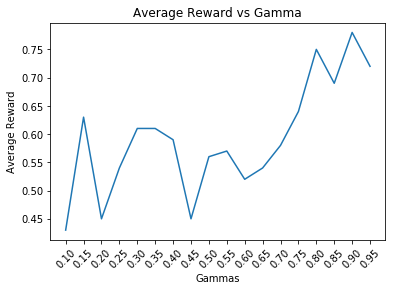

In [4]:
plt.xlabel('Gammas')
plt.ylabel('Average Reward')
plt.xticks(gammas, rotation=45)
plt.title('Average Reward vs Gamma')
plt.plot(gammas, listscore)

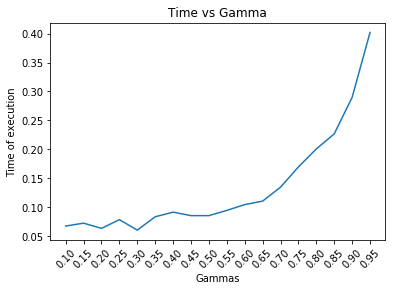

In [5]:
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.xticks(gammas, rotation=45)
plt.title('Time vs Gamma')
plt.plot(gammas, times)

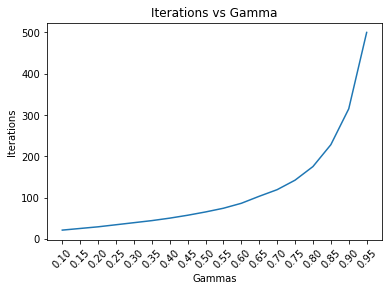

In [6]:
plt.xlabel('Gammas')
plt.ylabel('Iterations')
plt.xticks(gammas, rotation=45)
plt.title('Iterations vs Gamma')
plt.plot(gammas, iterations)

### Policy iteration

In [7]:
def run_episode(env, policy, gamma, render = False):
    obs = env.reset()
    total_reward = 0
    while True:
        if render:
            env.render()
        obs, reward, done , _ = env.step(int(policy[obs]))
        total_reward += reward
        if done:
            break
    return total_reward


def evaluate_policy(env, policy, gamma, n = 100):
    scores = [run_episode(env, policy, gamma, False) for _ in range(n)]
    return np.mean(scores)

def extract_policy(v, gamma):
    policy = np.zeros(env.nS)
    for s in range(env.nS):
        q_sa = np.zeros(env.nA)
        for a in range(env.nA):
            q_sa[a] = sum([p * (r + gamma * v[s_]) for p, s_, r, _ in  env.P[s][a]])
        policy[s] = np.argmax(q_sa)
    return policy

def compute_policy_v(env, policy, gamma):
    v = np.zeros(env.nS)
    eps = 1e-10
    while True:
        prev_v = np.copy(v)
        for s in range(env.nS):
            policy_a = policy[s]
            v[s] = sum([p * (r + gamma * prev_v[s_]) for p, s_, r, is_done in env.P[s][policy_a]])
        if (np.sum((np.fabs(prev_v - v))) <= eps):
            # value converged
            break
    return v

def policy_iteration(env, gamma):
    policy = np.random.choice(env.nA, size=(env.nS))  
    max_iterations = 100000
    for i in range(1, max_iterations+1):
        old_policy_v = compute_policy_v(env, policy, gamma)
        new_policy = extract_policy(old_policy_v, gamma)
        if (np.all(policy == new_policy)):
            # print ('Policy-Iteration converged at step %d.' %(i))
            break
        policy = new_policy
    return policy, i

In [8]:
env_name = 'FrozenLake8x8-v0'
env = gym.make(env_name)
env = env.unwrapped

gammas = np.arange(0.1, 1, 0.05)
times=[]
iterations=[]
listscore=[]
pol_p=[]

for gamma in gammas:
    start = time.time()
    optimal_policy, k = policy_iteration(env, gamma=gamma)
    policy_score = evaluate_policy(env, optimal_policy, gamma=gamma)
    end = time.time()

    times.append(end-start)
    iterations.append(k)
    listscore.append(policy_score)
    pol_p.append(optimal_policy)

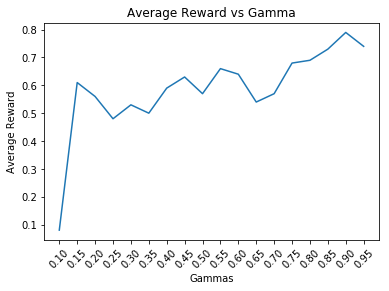

In [9]:
plt.xlabel('Gammas')
plt.ylabel('Average Reward')
plt.xticks(gammas, rotation=45)
plt.title('Average Reward vs Gamma')
plt.plot(gammas, listscore)

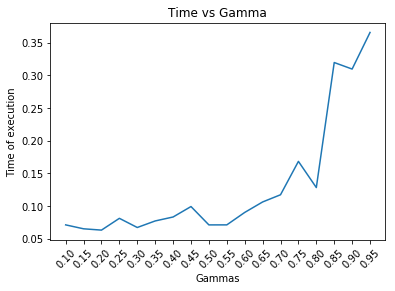

In [10]:
plt.xlabel('Gammas')
plt.ylabel('Time of execution')
plt.xticks(gammas, rotation=45)
plt.title('Time vs Gamma')
plt.plot(gammas, times)

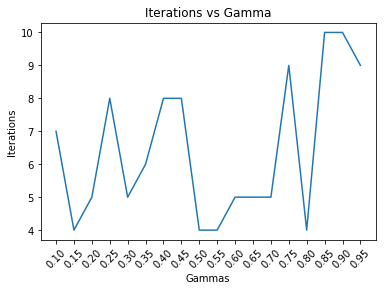

In [11]:
plt.xlabel('Gammas')
plt.ylabel('Iterations')
plt.xticks(gammas, rotation=45)
plt.title('Iterations vs Gamma')
plt.plot(gammas, iterations)

In [12]:
for x in range(len(pol_p)):
    if not (pol_p[x] == val_p[x]).all():
        print("Not the same Policy")
    else: 
        print("Same Policy")

Not the same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Same Policy
Not the same Policy
Same Policy
Same Policy


In [13]:
val_p[-1]

array([3., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 2., 2., 2., 1., 3.,
       3., 0., 0., 2., 3., 2., 1., 3., 3., 3., 1., 0., 0., 2., 1., 3., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 1., 1., 0.])

In [14]:
pol_p[-1]

array([3., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 2., 2., 2., 1., 3.,
       3., 0., 0., 2., 3., 2., 1., 3., 3., 3., 1., 0., 0., 2., 1., 3., 3.,
       0., 0., 2., 1., 3., 2., 0., 0., 0., 1., 3., 0., 0., 2., 0., 0., 1.,
       0., 0., 0., 0., 2., 0., 1., 0., 0., 1., 1., 1., 0.])

### Q learning

In [92]:
def q_learn_8(episodes=50000, alpha=0.628, gamma=0.9, maxsteps=10000):
    
    env = gym.make('FrozenLake8x8-v0')
    env = env.unwrapped
    
    Q = np.zeros((env.observation_space.n, env.action_space.n))
    optimal = [0]*env.observation_space.n
    
    rewards = []
    iterations = []
    start=time.time()

    # Start
    for episode in range(episodes):
        state = env.reset()
        done = False
        r = 0
        step = 0
        
        while step < maxsteps:
            
            step += 1

            # Choose action from Q table
            action = np.argmax(Q[state,:] + np.random.randn(1, env.action_space.n)*(1./(episode+1)))

            state2, reward, done, info = env.step(action)  
            
            Q[state, action] += alpha * (reward + gamma * np.max(Q[state2, :]) - Q[state, action])
            
            r += reward
            state = state2
            if done:
                break

        rewards.append(r)
        iterations.append(step)
        
    for k in range(env.observation_space.n):
        optimal[k] = np.argmax(Q[k, :])
    print(optimal)
        
    env.close()
    end = time.time()
    print("time :", end-start)
    return Q, rewards, iterations, end-start, optimal

In [93]:
%%time

alpha = [0.4, 0.6, 0.8]
gamma = [0.35, 0.65, 0.95]
results = []

for a in alpha:
    for g in gamma:
        print('alpha =', a, 'gamma =', g)
        result = q_learn_8(episodes=30000, alpha=a, gamma=g)
        results.append(result)

alpha = 0.4 gamma = 0.35
[2, 2, 2, 2, 1, 0, 2, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 3, 0, 0, 2, 3, 0, 2, 1, 3, 2, 3, 2, 0, 2, 1, 1, 3, 3, 0, 2, 0, 1, 1, 3, 0, 0, 3, 3, 0, 0, 1, 2, 0, 3, 2, 0, 1, 0, 2, 3, 3, 3, 0, 1, 1, 1, 0]
time : 17.009273290634155
alpha = 0.4 gamma = 0.65
[3, 1, 2, 1, 1, 1, 2, 0, 1, 1, 3, 2, 1, 0, 2, 1, 2, 0, 0, 0, 0, 3, 1, 1, 1, 2, 2, 3, 1, 0, 2, 1, 3, 1, 0, 0, 2, 1, 3, 0, 3, 0, 0, 2, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 2, 3, 3, 0, 0, 2, 3, 0]
time : 18.901265859603882
alpha = 0.4 gamma = 0.95
[2, 3, 2, 1, 2, 2, 2, 1, 3, 3, 3, 3, 3, 2, 2, 1, 2, 3, 0, 0, 2, 3, 1, 2, 3, 3, 3, 3, 0, 0, 2, 0, 2, 2, 3, 0, 0, 1, 2, 2, 0, 0, 0, 1, 3, 0, 0, 2, 3, 0, 2, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 0]
time : 46.13168239593506
alpha = 0.6 gamma = 0.35
[2, 1, 3, 1, 3, 0, 1, 2, 1, 2, 2, 3, 1, 2, 1, 2, 3, 2, 0, 0, 1, 1, 1, 0, 2, 2, 1, 3, 0, 0, 0, 1, 1, 0, 3, 0, 2, 1, 1, 2, 0, 0, 0, 2, 3, 2, 0, 2, 0, 0, 3, 3, 0, 1, 0, 2, 1, 1, 3, 0, 0, 2, 3, 0]
time : 18.31377673149109
alpha = 0.6 gamma = 0.65
[

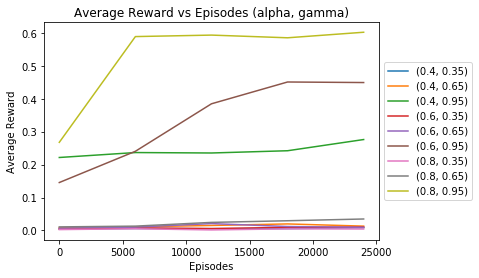

In [94]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 5)
avg = []
tmp = [(x,y) for x in alpha for y in gamma]

# plt.figure(figsize=(16, 8))
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes (alpha, gamma)')

for i, result in enumerate(results):
    r = result[1]
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(r), size), averages, label=tmp[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

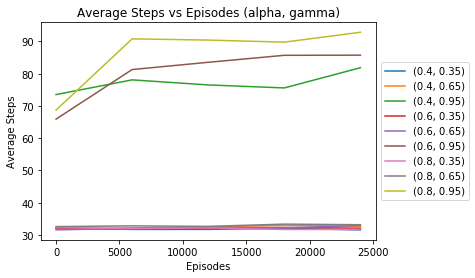

In [95]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

episodes = 30000
size = int(episodes / 5)
avg = []
tmp = [(x,y) for x in alpha for y in gamma]

# plt.figure(figsize=(16, 8))
plt.xlabel('Episodes')
plt.ylabel('Average Steps')
plt.title('Average Steps vs Episodes (alpha, gamma)')

for i, result in enumerate(results):
    r = result[2]
    chunks = list(chunk_list(r, size))
    averages = [sum(chunk) / len(chunk) for chunk in chunks]

    plt.plot(range(0, len(r), size), averages, label=tmp[i])

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<BarContainer object of 9 artists>

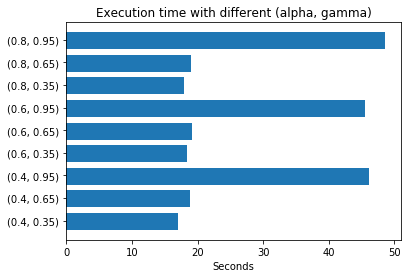

In [96]:
times = [r[3] for r in results]

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(times))  # the x locations for the groups

ax.set_yticks(ind+width/20)
ax.set_yticklabels(tmp, minor=False)
plt.title('Execution time with different (alpha, gamma)')
plt.xlabel('Seconds')
ax.barh(ind, times, width)

In [30]:
result = q_learn_8(episodes=60000, alpha=0.9, gamma=0.99)

[3, 2, 2, 2, 1, 2, 2, 1, 3, 3, 3, 3, 3, 3, 3, 2, 2, 0, 0, 0, 2, 3, 2, 2, 0, 3, 3, 3, 0, 0, 2, 0, 3, 3, 3, 0, 2, 1, 3, 1, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 2, 1, 0]
time : 144.91940546035767


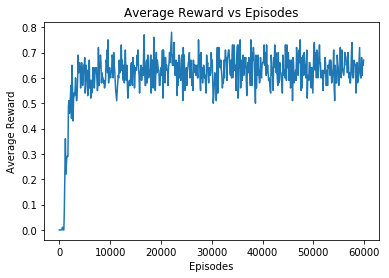

In [90]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

rewards = result[1]
epis = 60000
size = int(epis / 600)
chunks = list(chunk_list(rewards, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.plot(range(0, len(rewards), size), averages)

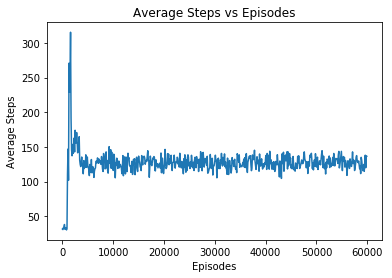

In [91]:
# Plot results
def chunk_list(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

iters = result[2]
epis = 60000
size = int(epis / 600)
chunks = list(chunk_list(iters, size))
averages = [sum(chunk) / len(chunk) for chunk in chunks]

plt.xlabel('Episodes')
plt.ylabel('Average Steps')
plt.title('Average Steps vs Episodes')
plt.plot(range(0, len(iters), size), averages)

In [88]:
import pprint

print("QL optimal policy\n")
pp = pprint.PrettyPrinter(width=25, compact=True)
pp.pprint(result[-1])
print("\ntime :", result[3])

QL optimal policy

[3, 2, 2, 2, 1, 2, 2, 1,
 3, 3, 3, 3, 3, 3, 3, 2,
 2, 0, 0, 0, 2, 3, 2, 2,
 0, 3, 3, 3, 0, 0, 2, 0,
 3, 3, 3, 0, 2, 1, 3, 1,
 0, 0, 0, 2, 3, 0, 0, 2,
 0, 0, 1, 0, 0, 2, 0, 2,
 0, 1, 0, 0, 0, 2, 1, 0]

time : 144.91940546035767


In [87]:
print("VI optimal policy gamma=0.95\n")
pp = pprint.PrettyPrinter(width=25, compact=True)
pp.pprint([int(x) for x in list(val_p[-1])])

VI optimal policy gamma=0.95

[3, 2, 2, 2, 2, 2, 2, 2,
 3, 3, 3, 3, 2, 2, 2, 1,
 3, 3, 0, 0, 2, 3, 2, 1,
 3, 3, 3, 1, 0, 0, 2, 1,
 3, 3, 0, 0, 2, 1, 3, 2,
 0, 0, 0, 1, 3, 0, 0, 2,
 0, 0, 1, 0, 0, 0, 0, 2,
 0, 1, 0, 0, 1, 1, 1, 0]


In [86]:
print("PI optimal policy gamma=0.95\n")
pp = pprint.PrettyPrinter(width=25, compact=True)
pp.pprint([int(x) for x in list(pol_p[-1])])

PI optimal policy gamma=0.95

[3, 2, 2, 2, 2, 2, 2, 2,
 3, 3, 3, 3, 2, 2, 2, 1,
 3, 3, 0, 0, 2, 3, 2, 1,
 3, 3, 3, 1, 0, 0, 2, 1,
 3, 3, 0, 0, 2, 1, 3, 2,
 0, 0, 0, 1, 3, 0, 0, 2,
 0, 0, 1, 0, 0, 0, 0, 2,
 0, 1, 0, 0, 1, 1, 1, 0]


In [70]:
# episodes=60000, alpha=0.9, gamma=0.99
Q = result[0]

env = gym.make('FrozenLake8x8-v0')
state = env.reset()
done = False
env.render()
count = 0

while not done:
    count += 1
    action = np.argmax(Q[state, :])
    state2, reward, done, info = env.step(action)  
    state = state2
    env.render()
print('\nSteps took =', count)


SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Up)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
FFFHFFFF
FHHFFFHF
FHFFHFHF
FFFHFFFG
  (Right)
SFFFFFFF
FFFFFFFF
FFFHFFFF
FFFFFHFF
